<a href="https://colab.research.google.com/github/Raniya-dev/Detection-and-Classification-of-Diabetic-Retinopathy/blob/main/DensetNet121_Mam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import os
import numpy as np
from PIL import Image

In [ ]:
x=[]
y=[]
base_path='/content/drive/MyDrive/DRdata/Train Images'
source_path=base_path
for child in os.listdir(source_path):
  sub_path=os.path.join(source_path,child)
  if os.path.isdir(sub_path):
    for data_file in os.listdir(sub_path):
      x_i=Image.open(os.path.join(sub_path,data_file))
      x_i=np.array(x_i.resize((128,128)))/255.0
      x.append(x_i)
      y.append(child)

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
#from keras.utils import np_utils
from keras.utils import to_categorical

x_train=np.array(x)
y_train=np.array(y)
le=preprocessing.LabelBinarizer()
#le=preprocessing.LabelEncoder()
y_train=le.fit(y_train).transform(y)
print(x_train.shape)

(622, 128, 128, 3)


In [ ]:
x=[]
y=[]
base_path='/content/drive/MyDrive/DRdata/Test Images'
source_path=base_path
for child in os.listdir(source_path):
  sub_path=os.path.join(source_path,child)
  if os.path.isdir(sub_path):
    for data_file in os.listdir(sub_path):
      x_i=Image.open(os.path.join(sub_path,data_file))
      x_i=np.array(x_i.resize((128,128)))/255.0
      x.append(x_i)
      y.append(child)

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
#from keras.utils import np_utils
from keras.utils import to_categorical

x_test=np.array(x)
y_test=np.array(y)
le=preprocessing.LabelBinarizer()
#le=preprocessing.LabelEncoder()
y_test=le.fit(y_test).transform(y)
print(x_test.shape)

(137, 128, 128, 3)


import os
import numpy as np
from PIL import Image

In [ ]:
# Model specifications
# import the necessary packages
import os
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
from keras.layers import MaxPooling2D
# specify the shape of the inputs for our network
IMG_SHAPE = (128, 128, 3)
# specify the batch size and number of epochs
BATCH_SIZE =4
EPOCHS = 20



In [ ]:
def build_basefeatures(images):
  import os
  from PIL import Image
  import numpy as np
  import tensorflow
  import keras
  import cv2
  from matplotlib import pyplot as pyplot
  from keras.layers import Input, Lambda, Dense, Flatten
  from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, multiply, Permute, Conv2D, Add, Activation,Concatenate
  from keras.models import Model
  #from keras.applications.inception_v3 import InceptionV3
  from keras.applications.vgg16 import VGG16
  from keras.applications.vgg19 import VGG19
  from keras.applications.xception import Xception
  from keras.applications.densenet import DenseNet121
  from keras.applications.densenet import DenseNet169
  from keras.applications.mobilenet_v2 import MobileNetV2
  from keras.applications.resnet import ResNet50
  from keras.applications.inception_v3 import InceptionV3

  inputs = Input(images)
  base_model = DenseNet121(weights="imagenet", include_top=False)
  #base_model = Xception(weights= None, include_top=False)

  base_model.trainable = False
  for layer in base_model.layers:
    if isinstance(layer, keras.layers.BatchNormalization):
      layer.trainable = False
  print(base_model.summary())
  #create new model on the top
  inputs = keras.Input(shape=(128, 128, 3))
  # We make sure that the base_model is running in inference mode here,
  # by passing `training=False
  base_feature = base_model(inputs, training=False)
  # Convert features of shape `base_model.output_shape[1:]` to vectors
  x = keras.layers.GlobalAveragePooling2D()(base_feature)
  #x = keras.layers.GlobalMaxPooling2D()(base_feature)
  #x = keras.layers.Flatten()(base_feature)
  x = Dropout(0.2)(x)
  x = Dense(units=1024, activation='relu')(x)
#  x = Dropout(0.2)(x)
  #x = Dense(units=512, activation='relu')(x)
 # x = Dropout(0.2)(x)
  #x = Dense(units=256, activation='relu')(x)
  #x = Dropout(0.2)(x)
  #x = Dense(units=128, activation='relu')(x)
  #x = Dropout(0.2)(x)
  #x = Dense(units=64, activation='relu')(x)
  #x = Dropout(0.2)(x)
  outputs = Dense(units=4, activation='softmax')(x)

  model=Model(inputs,outputs)
  print(model.summary())
  return model


In [ ]:
# import the necessary packages
#from tensorflow.keras.layers import bn_layer
from keras.models import Model
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Lambda
import numpy as np


In [ ]:
imgA = Input(shape=IMG_SHAPE) #image 2
basefeatures=build_basefeatures(IMG_SHAPE)
featsbase=basefeatures(imgA)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, None, None, 3)  │              0 │ input_layer_2[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, None, None, 64) │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, None, None, 64) │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, None, None, 64) │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None,     │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None,     │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None,     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 32) │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, None, None, 96) │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

None


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 4, 4, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,091,204 (30.87 MB)

 Trainable params: 1,053,700 (4.02 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

None


In [ ]:
model=Model(inputs=imgA,outputs=featsbase)

In [ ]:
#import keras
from tensorflow import keras
import tensorflow as tf
#from keras.layers import Input, Conv2D, Lambda, merge, Dense, Flatten,MaxPooling2D
from keras.layers import Input, Conv2D, Lambda, Dense, Flatten,MaxPooling2D
from keras.models import Model, Sequential
from keras.regularizers import l2

# ... (rest of your imports and code)

def recall_m(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

def precision_m(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))  # Calculate predicted_positives
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision  # Return precision

def f1_m(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return (2*((precision*recall)/(precision+recall+tf.keras.backend.epsilon())))

# ... (rest of your code)

print("[INFO] compiling model...")
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy",tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),f1_m])

# ... (rest of your code)

[INFO] compiling model...


In [ ]:
'''#import keras
from tensorflow import keras
import tensorflow as tf
#from keras.layers import Input, Conv2D, Lambda, merge, Dense, Flatten,MaxPooling2D
from keras.layers import Input, Conv2D, Lambda, Dense, Flatten,MaxPooling2D
from keras.models import Model, Sequential
from keras.regularizers import l2
print("[INFO] compiling model...")
optimizer= keras.optimizers.Adam(learning_rate=0.001)
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#callback_list = [callback]
model.compile(loss="categorical_crossentropy", optimizer=optimizer,   metrics=["accuracy",tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),f1_m])


[INFO] compiling model...


In [ ]:
'''from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return (2*((precision*recall)/(precision+recall+K.epsilon())))




SyntaxError: incomplete input (<ipython-input-27-d75c1a6a7f6e>, line 1)

In [ ]:
history = model.fit(
  x_train[:], y_train[:],
   batch_size=BATCH_SIZE, epochs=EPOCHS)


Epoch 1/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - accuracy: 0.5107 - f1_m: 0.5020 - loss: 2.0474 - precision: 0.5150 - recall: 0.4903
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7032 - f1_m: 0.6888 - loss: 0.7955 - precision: 0.7308 - recall: 0.6683
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7830 - f1_m: 0.7742 - loss: 0.6032 - precision: 0.8036 - recall: 0.7511
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7440 - f1_m: 0.7323 - loss: 0.5799 - precision: 0.7609 - recall: 0.7119
Epoch 5/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7934 - f1_m: 0.7849 - loss: 0.5926 - precision: 0.8142 - recall: 0.7651
Epoch 6/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8269 - f1_m: 0.8201 - loss: 0.4756 - precision: 0.8427 - recall: 0.8047
Epoch 7/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8443 - f1_m: 0.8280 - loss: 0.4308 - precision: 0.8615 - recall: 0.8021
Epoch 8/20
156/156 ━━━━━━

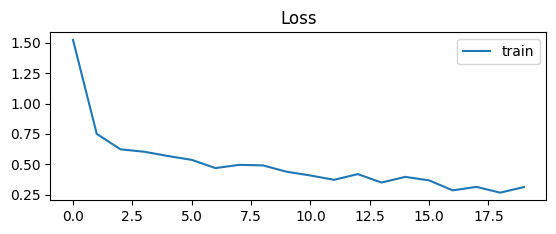

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()



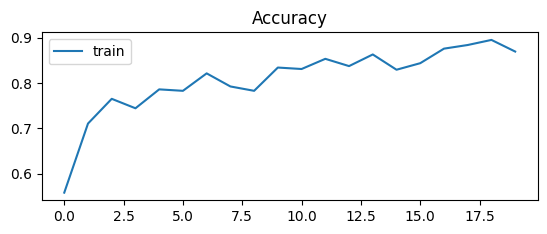

In [ ]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()



In [ ]:
# evaluate the model
#train_acc = model.evaluate([pairTrain[:, 0], pairTrain[:, 1]], labelTrain[:], batch_size=64)
test_acc = model.evaluate([x_test[:]], y_test[:], batch_size=1)


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 128, 128, 3))',)
  warnings.warn(msg)


137/137 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.8926 - f1_m: 0.8858 - loss: 0.3752 - precision: 0.8991 - recall: 0.8858


In [ ]:
train_acc = model.evaluate([x_train[:]], y_train[:], batch_size=1)

622/622 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9727 - f1_m: 0.9666 - loss: 0.0889 - precision: 0.9740 - recall: 0.9666


In [ ]:
test_acc = model.evaluate([x_test[:]], y_test[:], batch_size=1)

137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8926 - f1_m: 0.8858 - loss: 0.3752 - precision: 0.8991 - recall: 0.8858


In [ ]:
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ functional (Functional)              │ (None, 4)                   │       8,091,204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,198,606 (38.90 MB)

 Trainable params: 1,053,700 (4.02 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

 Optimizer params: 2,107,402 (8.04 MB)

None


In [ ]:

y_predict=model.predict(x_test)
y_true=y_test
#res = tf.math.confusion_matrix(y_true,y_predict)

5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step


In [ ]:
y_pred = np.argmax (y_predict, axis = 1)
y_true=np.argmax(y_true, axis=1)

[[34  1  0  0]
 [ 4 28  0  2]
 [ 1  4 20  8]
 [ 0  5  5 25]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        35
           1       0.74      0.82      0.78        34
           2       0.80      0.61      0.69        33
           3       0.71      0.71      0.71        35

    accuracy                           0.78       137
   macro avg       0.78      0.78      0.78       137
weighted avg       0.78      0.78      0.78       137



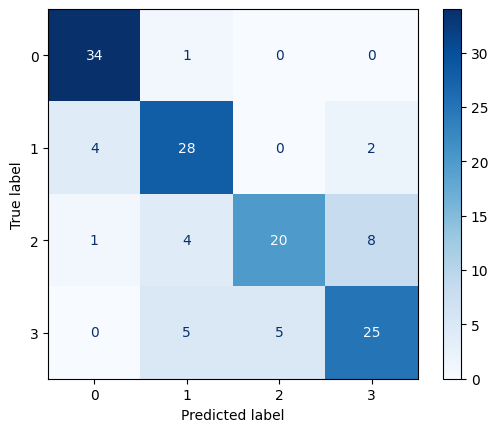

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

print(confusion_matrix(y_true=y_true, y_pred=y_pred))
print(classification_report(y_true, y_pred))
#plot_confusion_matrix(svm, X_test, y_test,cmap=plt.cm.Blues)
#plt.show()
cm = confusion_matrix(y_true, y_pred) # Assuming you have y_true and y_pred
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
#result = confusion_matrix(y_true, y_pred , normalize='pred')
result = confusion_matrix(y_true, y_pred)

In [ ]:
print(result)

[[34  1  0  0]
 [ 4 28  0  2]
 [ 1  4 20  8]
 [ 0  5  5 25]]


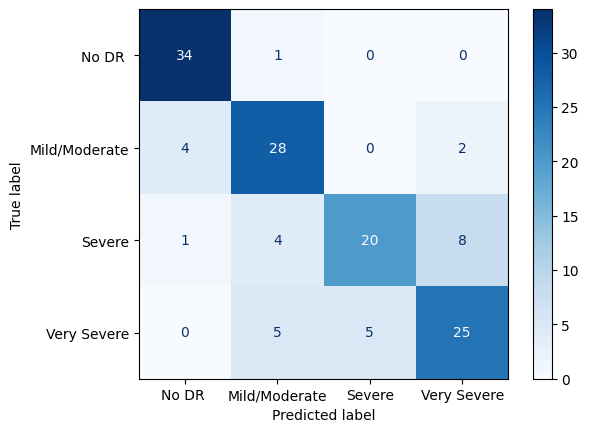

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = ["No DR ", "Mild/Moderate", "Severe", "Very Severe"]
disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()


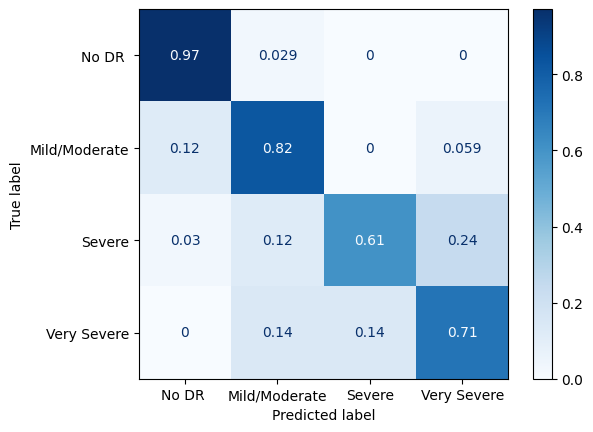

In [ ]:
normed_c = result / np.sum(result, axis=1, keepdims=True)
disp = ConfusionMatrixDisplay(confusion_matrix=normed_c, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

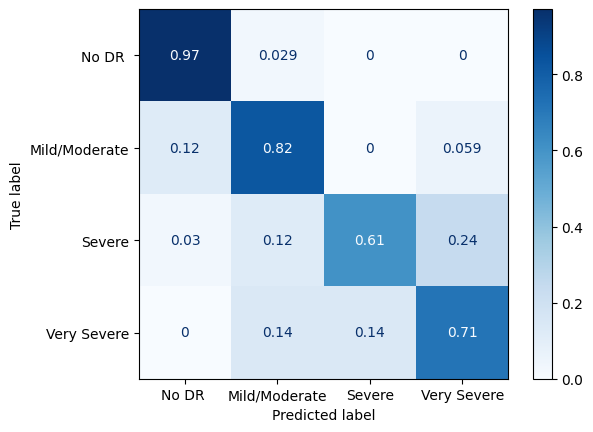

In [ ]:
normed_c = result / np.sum(result, axis=1, keepdims=True)
disp = ConfusionMatrixDisplay(confusion_matrix=normed_c, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
#Fine tuning
for layer in model.layers:
    # selecting layer by name
    if layer.name == 'model':
        layer.trainable = True



In [ ]:
#import keras
from tensorflow import keras
import tensorflow as tf
#from keras.layers import Input, Conv2D, Lambda, merge, Dense, Flatten,MaxPooling2D
from keras.layers import Input, Conv2D, Lambda, Dense, Flatten,MaxPooling2D
from keras.models import Model, Sequential
from keras.regularizers import l2
print("[INFO] compiling model...")
optimizer= keras.optimizers.Adam(learning_rate=0.00001)
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#callback_list = [callback]
model.compile(loss="categorical_crossentropy", optimizer=optimizer,   metrics=["accuracy",tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),f1_m])


[INFO] compiling model...


In [ ]:
history = model.fit(
  x_train[:], y_train[:],
 batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 34s 61ms/step - accuracy: 0.9485 - f1_m: 0.9406 - loss: 0.1884 - precision_1: 0.9513 - recall_1: 0.9334
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9219 - f1_m: 0.9160 - loss: 0.2014 - precision_1: 0.9249 - recall_1: 0.9101
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9519 - f1_m: 0.9538 - loss: 0.1718 - precision_1: 0.9581 - recall_1: 0.9505
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9389 - f1_m: 0.9420 - loss: 0.1832 - precision_1: 0.9469 - recall_1: 0.9382
Epoch 5/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9183 - f1_m: 0.9149 - loss: 0.2015 - precision_1: 0.9328 - recall_1: 0.9012
Epoch 6/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9390 - f1_m: 0.9388 - loss: 0.1663 - precision_1: 0.9401 - recall_1: 0.9379
Epoch 7/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9318 - f1_m: 0.9348 - loss: 0.1736 - precision_1: 0.9411 - recall_1: 0.931

In [ ]:
# evaluate the model
#train_acc = model.evaluate([pairTrain[:, 0], pairTrain[:, 1]], labelTrain[:], batch_size=64)
test_acc = model.evaluate([x_test[:]], y_test[:], batch_size=1)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 128, 128, 3))',)
  warnings.warn(msg)


137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9048 - f1_m: 0.8960 - loss: 0.3402 - precision_1: 0.9077 - recall_1: 0.8960


In [ ]:
train_acc = model.evaluate([x_train[:]], y_train[:], batch_size=1)

622/622 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9852 - f1_m: 0.9823 - loss: 0.0644 - precision_1: 0.9852 - recall_1: 0.9823


In [ ]:
y_predict=model.predict(x_test)
y_true=y_test

5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step


In [ ]:
y_pred = np.argmax (y_predict, axis = 1)
y_true=np.argmax(y_true, axis=1)

[[34  1  0  0]
 [ 4 28  0  2]
 [ 1  3 23  6]
 [ 0  4  6 25]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        35
           1       0.78      0.82      0.80        34
           2       0.79      0.70      0.74        33
           3       0.76      0.71      0.74        35

    accuracy                           0.80       137
   macro avg       0.80      0.80      0.80       137
weighted avg       0.80      0.80      0.80       137



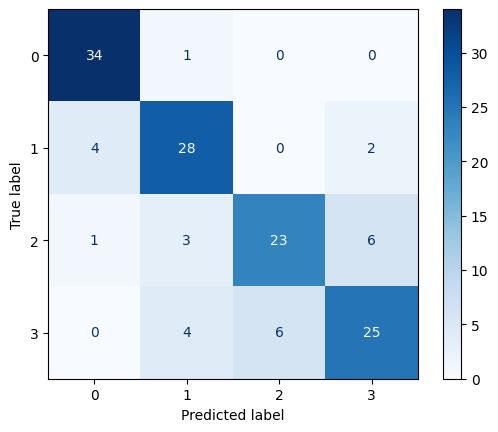

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

print(confusion_matrix(y_true=y_true, y_pred=y_pred))
print(classification_report(y_true, y_pred))
#plot_confusion_matrix(svm, X_test, y_test,cmap=plt.cm.Blues)
#plt.show()
cm = confusion_matrix(y_true, y_pred) # Assuming you have y_true and y_pred
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
#result = confusion_matrix(y_true, y_pred , normalize='pred')
result = confusion_matrix(y_true, y_pred)

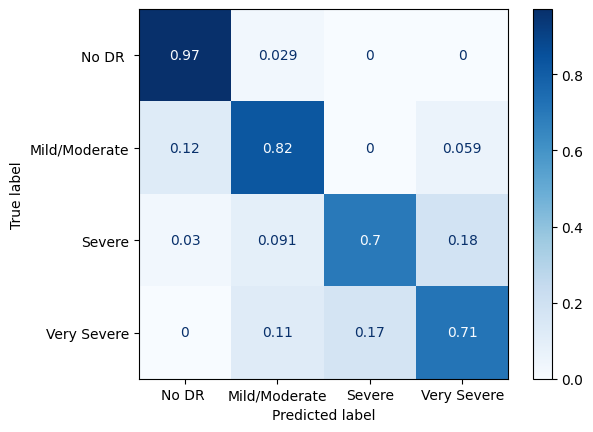

In [ ]:
normed_c = result / np.sum(result, axis=1, keepdims=True)
disp = ConfusionMatrixDisplay(confusion_matrix=normed_c, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()